In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

In [48]:
df_train=pd.read_csv("dataset_malwares.csv")
df_train.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [49]:
df_train.shape

(19611, 79)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [10]:
df_train.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [11]:
df_train.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [16]:
df_train.Malware

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

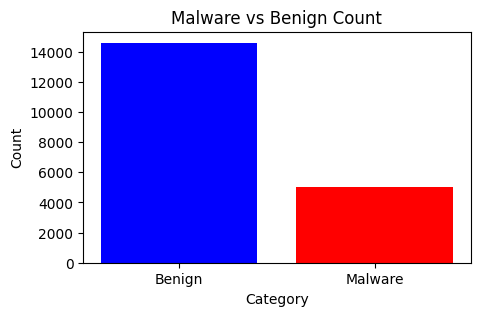

In [21]:
# Подсчет количества объектов в каждой категории
malware_count = df_train['Malware'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(5, 3))
plt.bar(['Benign', 'Malware'], malware_count, color=['blue', 'red'])

# Добавление подписей
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Malware vs Benign Count')

# Отображение графика
plt.show()

In [23]:
# Вывод столбцов с одним уникальным значением
print("Columns having only 1 unique Value")
unique_columns = [col for col in df_train if df_train[col].nunique() == 1]
for col in unique_columns:
    print(col)

Columns having only 1 unique Value
e_magic
SectionMaxEntropy
SectionMaxRawsize
SectionMaxVirtualsize
SectionMinPhysical
SectionMinVirtual
SectionMinPointerData
SectionMainChar


In [52]:
X=df_train.drop(['Name','Malware','e_magic',
'SectionMaxEntropy',
'SectionMaxRawsize',
'SectionMaxVirtualsize',
'SectionMinPhysical',
'SectionMinVirtual',
'SectionMinPointerData',
'SectionMainChar'],axis=1)

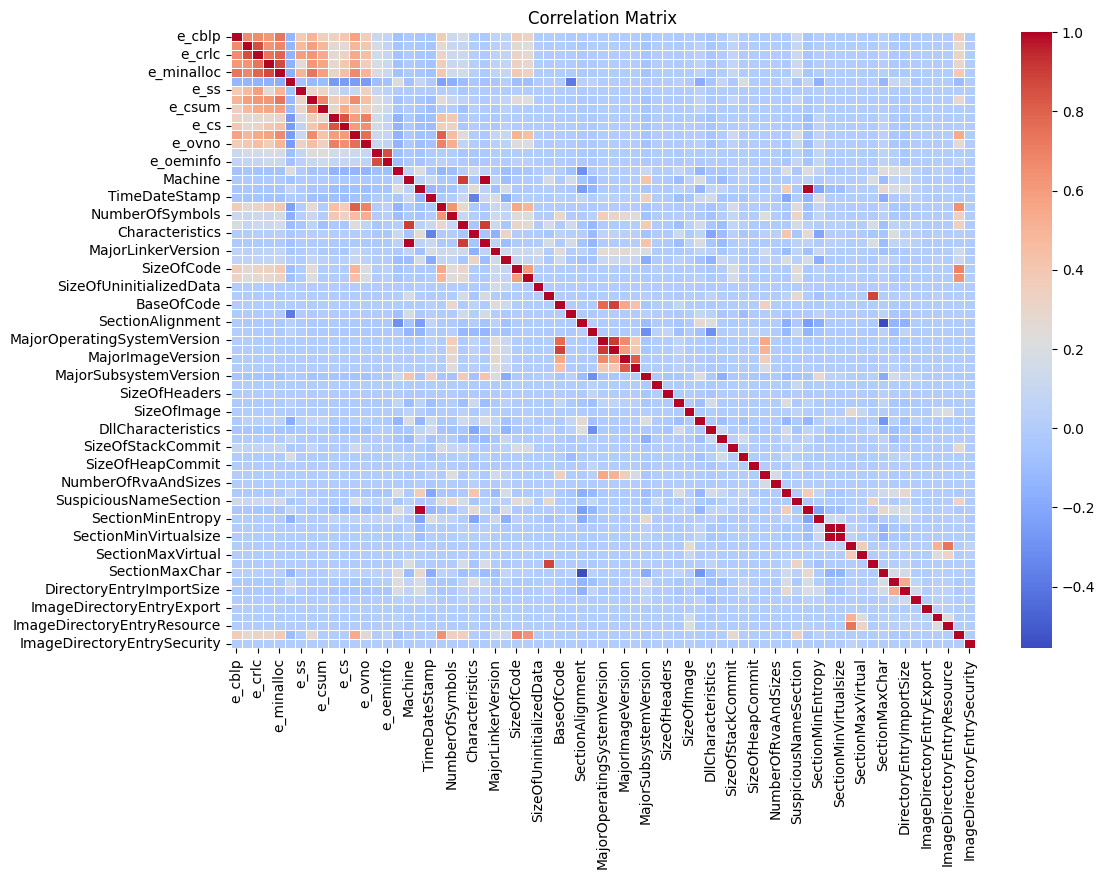

In [53]:
# Вычисление корреляции
corr_matrix = X.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [54]:
X=X.drop(['e_cblp', 'e_minalloc', 'MajorOperatingSystemVersion', 'DirectoryEntryImportSize'],axis=1)

In [55]:
df_test=pd.read_csv("dataset_test.csv")
X_t=df_test.drop(['Name','e_magic',
'SectionMaxEntropy',
'SectionMaxRawsize',
'SectionMaxVirtualsize',
'SectionMinPhysical',
'SectionMinVirtual',
'SectionMinPointerData',
'SectionMainChar', 'e_cblp', 'e_minalloc', 'MajorOperatingSystemVersion', 'DirectoryEntryImportSize'],axis=1)

In [56]:
y=df_train['Malware']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Обучение логистической регрессии
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


c:\Users\a.sakovich\Desktop\SHIK\docling\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Вывод метрик точности
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       995
           1       0.93      0.96      0.95      2928

    accuracy                           0.92      3923
   macro avg       0.91      0.88      0.89      3923
weighted avg       0.92      0.92      0.92      3923

Confusion Matrix:
[[ 792  203]
 [ 106 2822]]


In [61]:
# Обучение нейронной сети (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50, 20), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_nn = mlp.predict(X_test)

In [62]:
print("\nNeural Network Metrics:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


Neural Network Metrics:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       995
           1       0.92      0.94      0.93      2928

    accuracy                           0.90      3923
   macro avg       0.87      0.85      0.86      3923
weighted avg       0.90      0.90      0.90      3923

Confusion Matrix:
[[ 754  241]
 [ 163 2765]]


In [63]:
# ROC-кривые
y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob_nn = mlp.predict_proba(X_test)[:, 1]

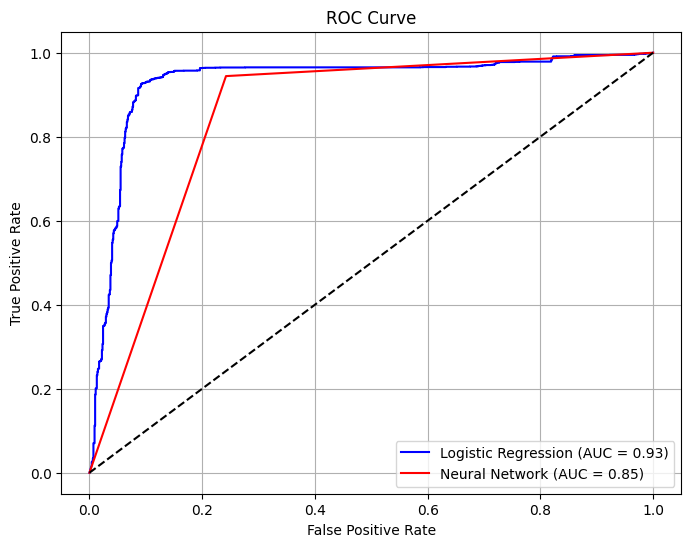

In [64]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Линия случайной модели
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()